<a href="https://colab.research.google.com/github/igorwalacec/TechChallenge/blob/develop/TechChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a base de dados

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px

In [236]:
import warnings
warnings.filterwarnings('ignore')

## Carregando os dados a partir de um arquivo CSV

Visto que inventar dados pode introduzir vieses e padrões que não existem no mundo real, prejudicando a qualidade do modelo, pesquisamos na internet ontes de Dados Públicos e encontramos um conjunto de dados na plataforma Kaggle que atende nossos propósitos, no nosso caso um conjunto de dados de
despesa médicas semelhantes ao nosso projeto:

Fonte: https://www.kaggle.com/datasets/mirichoi0218/insurance
(Data pesquisa 29/07/2024)

In [237]:
dados = pd.read_csv('/content/insurance.csv');
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Para ver a quantidade de linhas e dimensoes no arquivo

In [238]:
dados.shape

(1338, 7)

Para analisar os valores númericos da nossa base

In [239]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#  Análise exploratória dos dados



## Swarmplot
Visualizando a distribuição dos encargos em relação ao status de fumante e gênero usando o swarmplot ajuda a ver a dispersão dos dados para cada categoria de fumante, diferenciando por gênero.

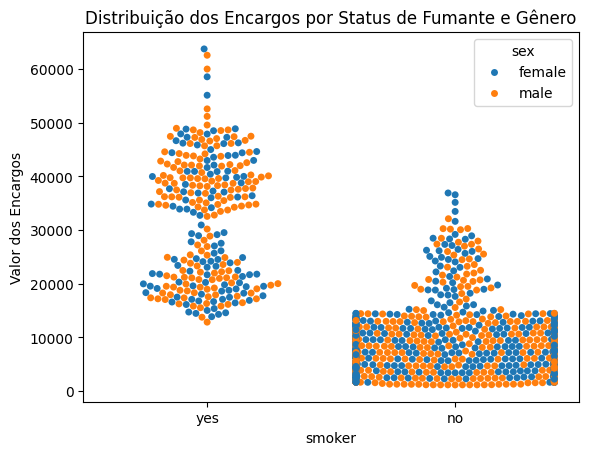

In [240]:
ax = sns.swarmplot(data=dados, x="smoker", y="charges", hue="sex")
ax.set(ylabel="Valor dos Encargos")
plt.title("Distribuição dos Encargos por Status de Fumante e Gênero")
plt.show()

Analisando a relação entre idade e encargos, diferenciando por status de fumante

Isso ajuda a entender se a idade e o hábito de fumar influenciam os encargos

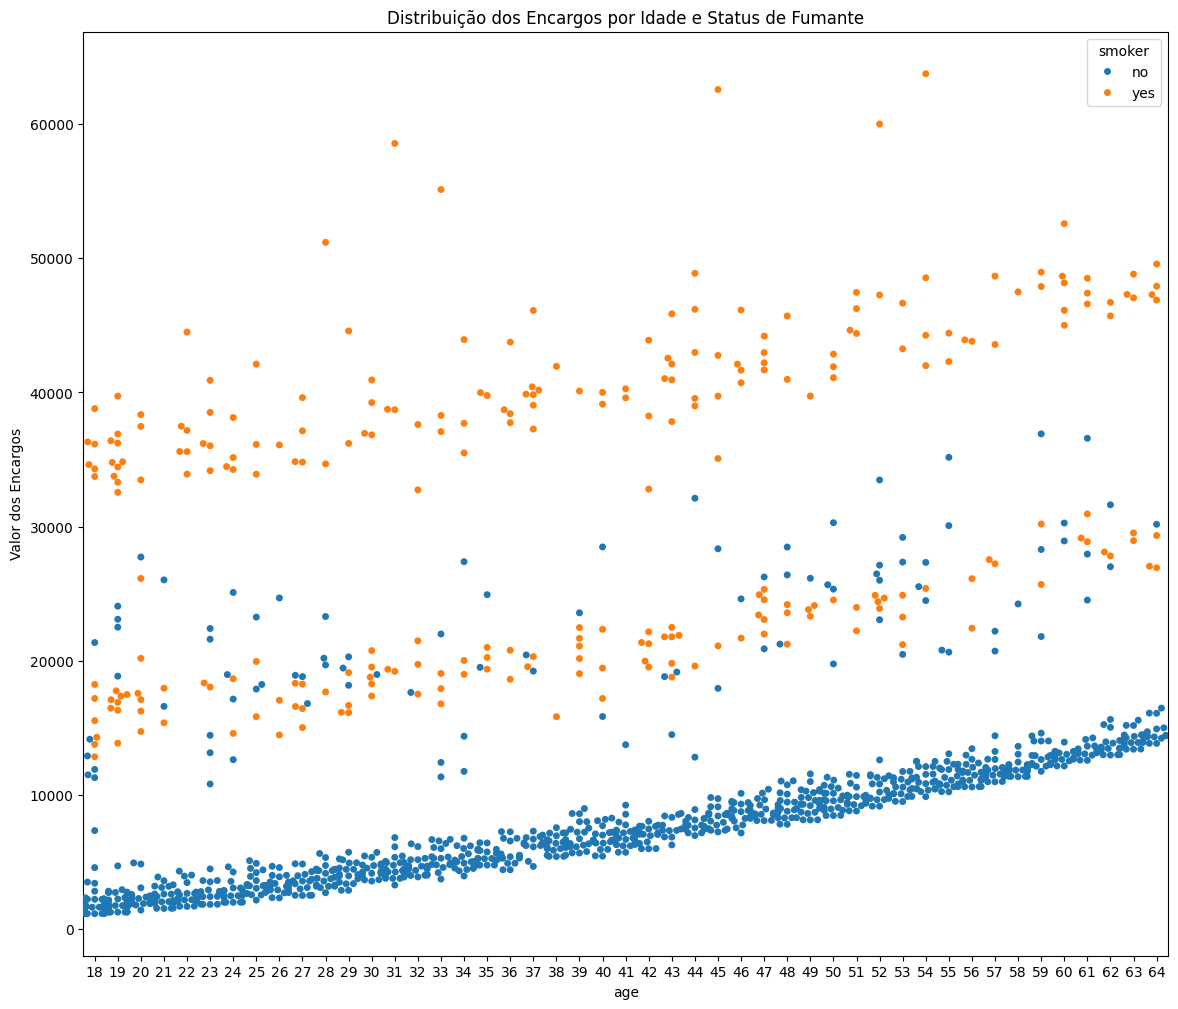

In [241]:
plt.figure(figsize=(14, 12))
ax = sns.swarmplot(data=dados, x="age", y="charges", hue="smoker")
ax.set(ylabel="Valor dos Encargos")
plt.title("Distribuição dos Encargos por Idade e Status de Fumante")
plt.show()

Explorando a relação entre IMC e encargos, com status de fumante o IMC é um fator importante para os custos de saúde e sua relação com o fumo é analisada aqui

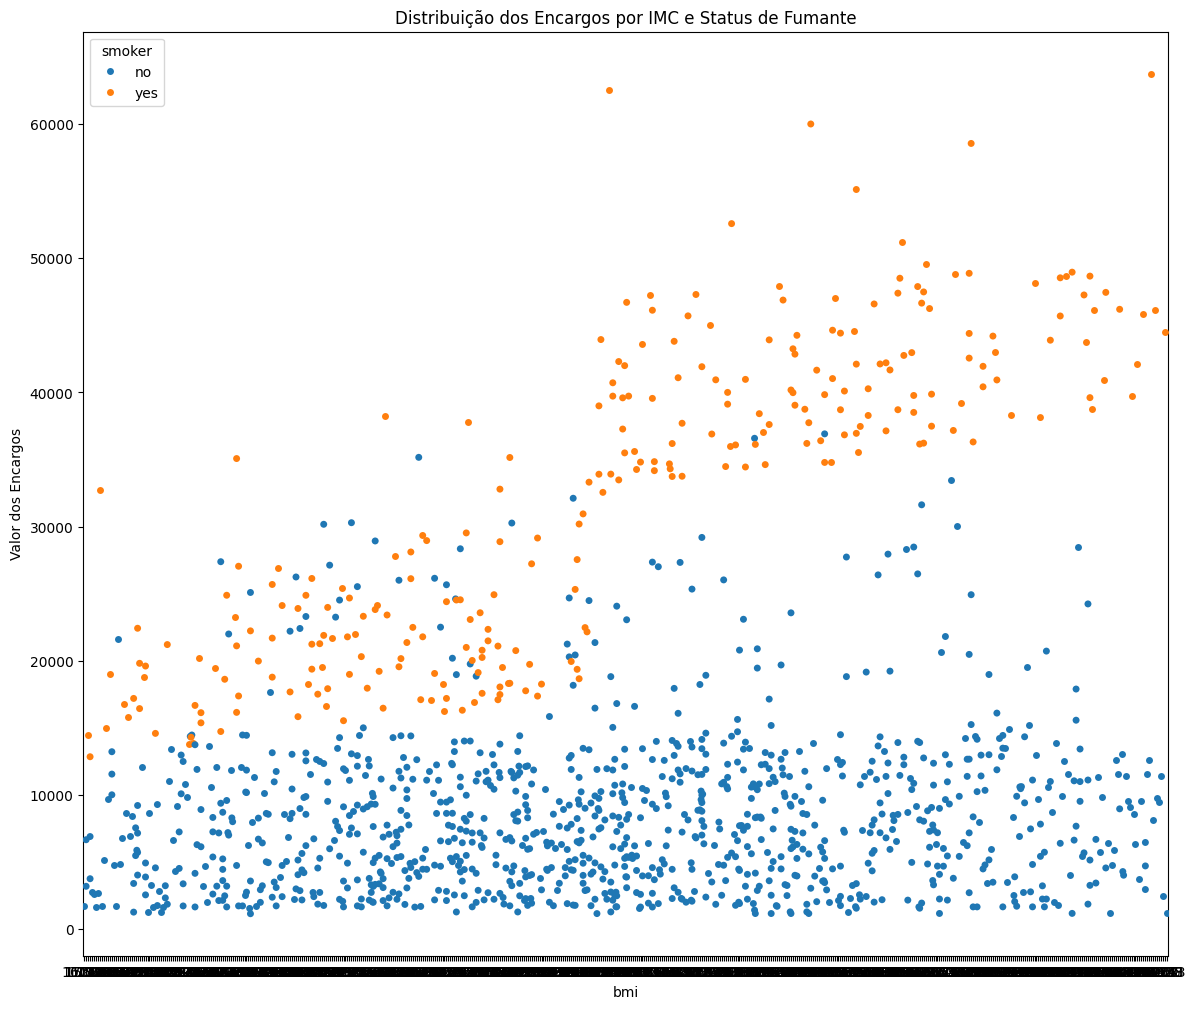

In [242]:
plt.figure(figsize=(14, 12))
ax = sns.swarmplot(data=dados, x="bmi", y="charges", hue="smoker")
ax.set(ylabel="Valor dos Encargos")
plt.title("Distribuição dos Encargos por IMC e Status de Fumante")
plt.show()

## Boxplot
O boxplot é uma ferramenta visual  para entender a distribuição dos dados. Ele ajuda a identificar mediana, a dispersão e possíveis outliers em cada variável.

Essa análise é crucial para identificar se há necessidade de tratar outliers ou se alguma transformação nos dados pode melhorar o desempenho do modelo.
 Cada boxplot representa:
- A linha central (mediana) que divide a caixa em dois. Isso mostra onde está o ponto médio dos dados.
- As bordas da caixa (primeiro e terceiro quartis) que indicam a amplitude interquartil (IQR), ou seja,
 onde está concentrada a maior parte dos dados.
- Os "bigodes" que se estendem a partir da caixa mostram a extensão dos dados sem considerar os outliers.
- Pontos fora dos bigodes são considerados outliers, que podem ser casos
 extremos que merecem uma investigação adicional.
 Encargos por Gênero: O gráfico pode mostrar que, mesmo que a mediana dos
 encargos seja semelhante entre homens e mulheres, pode haver uma dispersão
 maior para um dos gêneros.
 Encargos por Fumante: Fumantes tendem a ter encargos mais altos, como evidenciado
 por uma mediana mais elevada e uma maior dispersão dos valores.
 Boxplot segmentado para variáveis categóricas vs. 'encargos'

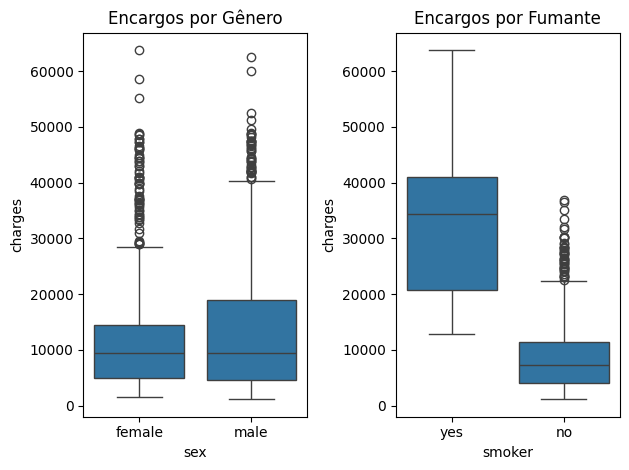

In [243]:
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='charges', data=dados)
plt.title('Encargos por Gênero')
plt.xticks([0, 1])

plt.subplot(1, 2, 2)
sns.boxplot(x='smoker', y='charges', data=dados)
plt.title('Encargos por Fumante')
plt.xticks([0, 1])

plt.tight_layout()
plt.show()

## Histogramas

 É uma  ferramenta para visualizar a distribuição de uma variável contínua e
 identificar padrões, como a simetria e possíveis assimetrias nos dados.
 Explorando a distribuição das variáveis usando histogramas para cada variável de interesse
 Isso nos dá uma ideia da distribuição dos dados para 'idade', 'imc', 'filhos' e 'encargos'
 Comentário sobre a análise dos Histogramas:

 Os histogramas fornecem uma visão clara da distribuição das variáveis
'idade', 'imc', 'filhos' e 'encargos' no dataset.
Cada gráfico mostra a distribuição de uma variável específica, permitindo observar a
 frequência dos dados em diferentes intervalos. A linha de densidade (kde=True) adiciona uma
 curva que ajuda a visualizar a forma da distribuição.
 Essas informações são úteis para entender a variabilidade e a tendência central das variáveis,
 ajudando a contextualizar os dados e é uma etapa fundamental antes de
 construir e ajustar o modelo preditivo.
- Idade: A distribuição é relativamente uniforme com uma leve concentração em idades mais jovens.
- IMC: A distribuição é levemente assimétrica, com uma maior concentração de valores em torno do IMC médio de 30.
- Filhos: A maioria dos indivíduos tem poucos filhos, com uma concentração significativa em 0 ou 1 filho.
- Encargos: A distribuição dos encargos é assimétrica, com uma cauda longa à direita,
indicando que a maioria das pessoas tem encargos mais baixos, mas há alguns casos com custos médicos muito altos.
As variáveis gênero e fumante não foram incluídas nos histogramas e boxplots anteriores
 porque elas são variáveis categóricas, e não numéricas contínuas. Histogramas e boxplots
  são mais adequados para variáveis numéricas,
 pois eles mostram a distribuição de valores contínuos ao longo de um eixo


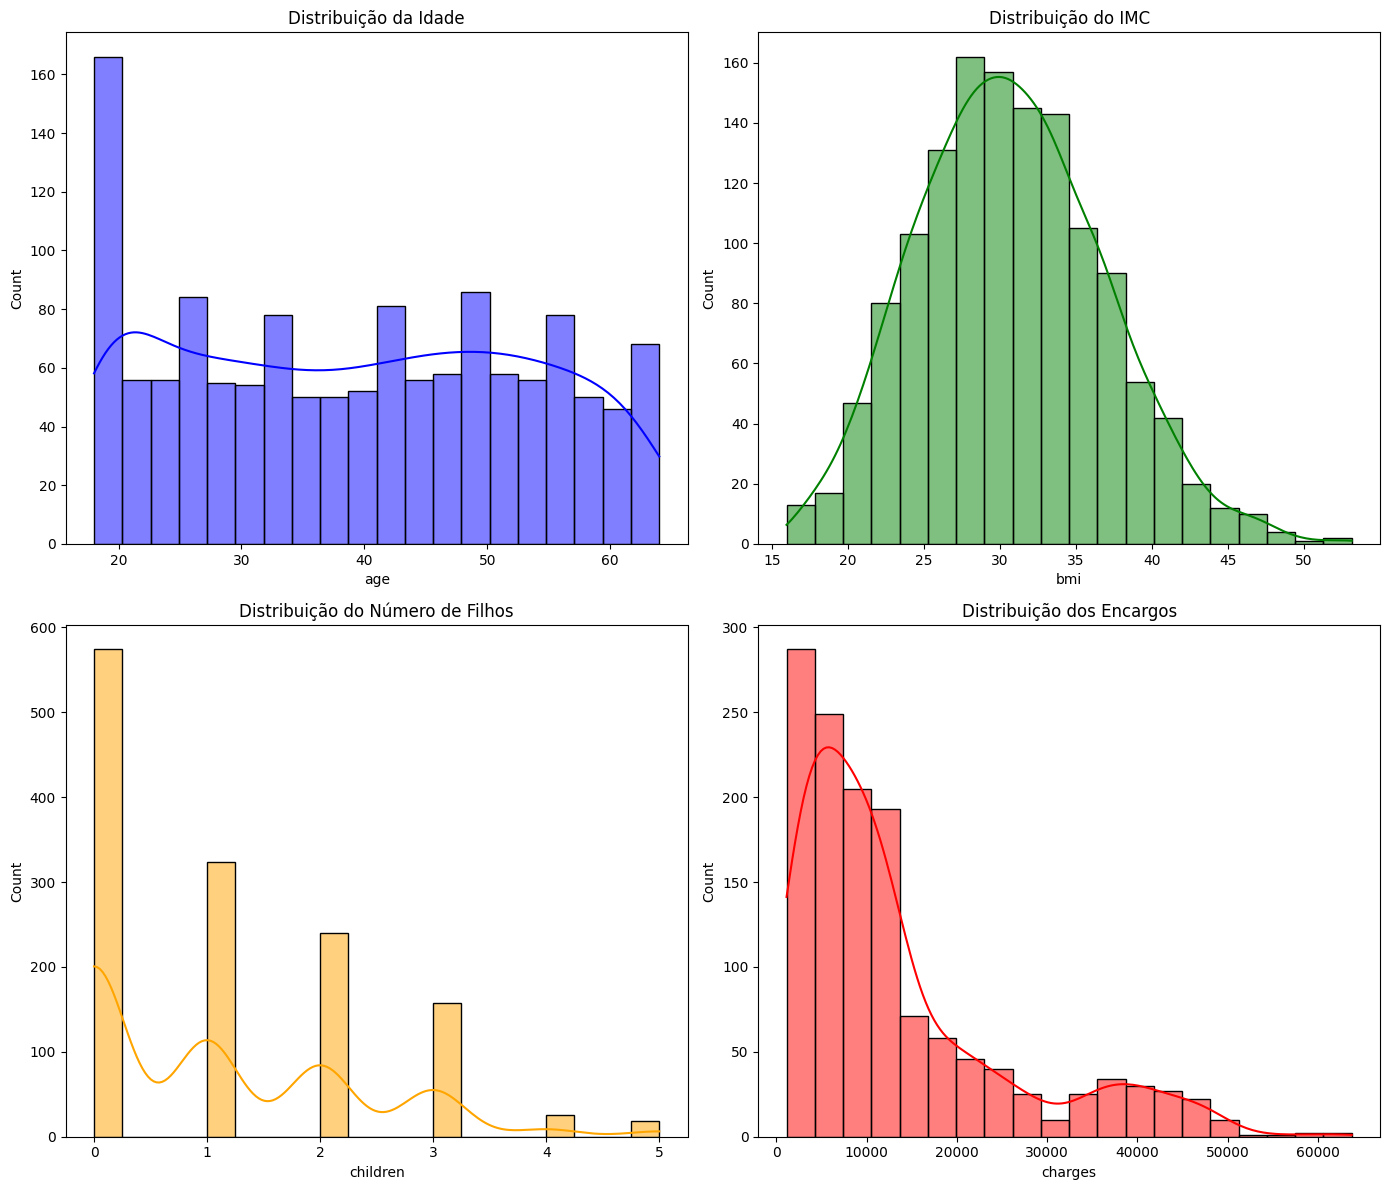

In [244]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.histplot(dados['age'], kde=True, bins=20, color='blue')
plt.title('Distribuição da Idade')

plt.subplot(2, 2, 2)
sns.histplot(dados['bmi'], kde=True, bins=20, color='green')
plt.title('Distribuição do IMC')

plt.subplot(2, 2, 3)
sns.histplot(dados['children'], kde=True, bins=20, color='orange')
plt.title('Distribuição do Número de Filhos')

plt.subplot(2, 2, 4)
sns.histplot(dados['charges'], kde=True, bins=20, color='red')
plt.title('Distribuição dos Encargos')

plt.tight_layout()
plt.show()

## Violin Plot

Quando se deseja entender a distribuição dos dados em relação a variáveis categóricas.

Este gráfico facilita a visualização das distribuições, tornando mais evidente como os encargos variam entre diferentes categorias de fumantes e entre gêneros.

O Violin Plot combina aspectos de boxplot e gráfico de densidade, facilitando a visualização das distribuições e densidades dos dados

In [245]:
fig = px.violin(dados, y="charges", x="smoker", color="sex", box=True, points="all", title="Distribuição dos Encargos por Status de Fumante e Gênero")
fig.show()

## Insights

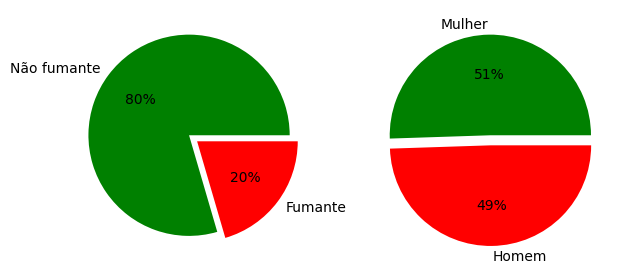

In [246]:
plt.subplot(1, 2, 1)
categorias = ["Não fumante", "Fumante"]
plt.pie(dados["smoker"].value_counts(), labels=categorias, autopct="%0.0f%%", explode=[0, 0.1], colors=("g", "r"))

plt.subplot(1, 2, 2)
categorias = ["Mulher", "Homem"]
plt.pie(dados["sex"].value_counts(), labels=categorias, autopct="%0.0f%%", explode=[0, 0.1], colors=("g", "r"))

plt.tight_layout()
plt.show()



# Pré-processamento

Convertendo variáveis categóricas para numéricas para que possam ser usadas no modelo Gênero e Fumante são convertidos em 0 e 1 Gênero: feminino = 0, masculino = 1 Fumante: não = 0, sim = 1

In [247]:
dados['sex'] = dados['sex'].map({'female': 0, 'male': 1})
dados['smoker'] = dados['smoker'].map({'no': 0, 'yes': 1})

Aplicando One-hot encoding para a coluna 'região' Isso cria colunas binárias para cada região, permitindo que o modelo lide com essas categorias

In [248]:
dados = pd.get_dummies(dados, columns=['region'])

Convertendo colunas booleanas de 'região' para inteiros (0 e 1)

Isso garante que todas as colunas numéricas tenham o mesmo tipo de dado
nteiros vs. Booleanos: Algumas implementações de modelos podem tratar True como 1 e False como 0 automaticamente, sem problemas. No entanto, para manter a consistência e evitar possíveis confusões, é uma boa prática converter explicitamente esses valores para 0 e 1.

Normalização dos Dados: Se você estiver normalizando ou padronizando os dados, ter valores booleanos misturados com inteiros pode afetar o resultado da normalização.

In [249]:
dados = dados.astype(int)

In [250]:
correlation_matriz = dados.corr().round(2)

## Heatmap

 Criando o heatmap com ajustes de formatação para visualizar a matriz de correlação
 O heatmap facilita a visualização das correlações, destacando aquelas que são mais fortes
 (próximas de -1 ou 1)
 O heatmap  mostra a correlação entre as variáveis e  são representadas
  por valores que variam de -1 a 1, onde:
- Valores próximos de 1 indicam uma correlação positiva forte, ou seja, à medida
que uma variável aumenta, a outra tende a aumentar também.
- Valores próximos de -1 indicam uma correlação negativa forte, onde uma variável aumenta enquanto a outra tende a diminuir.
- Valores próximos de 0 indicam pouca ou nenhuma correlação.
Analisando o heatmap, podemos observar que a variável 'fumante' tem uma
forte correlação positiva com 'encargos', o que indica que ser fumante aumenta
 significativamente os custos médicos. Outras variáveis, como 'idade' e 'imc',
 também mostram correlações positivas com 'encargos', embora em menor grau.

Já as variáveis 'gênero' e 'filhos' apresentam correlações mais fracas com 'encargos'.

Essa análise preliminar sugere que fatores como ser fumante, idade e IMC
 (Índice de Massa Corporal) são importantes na previsão dos custos médicos individuais.

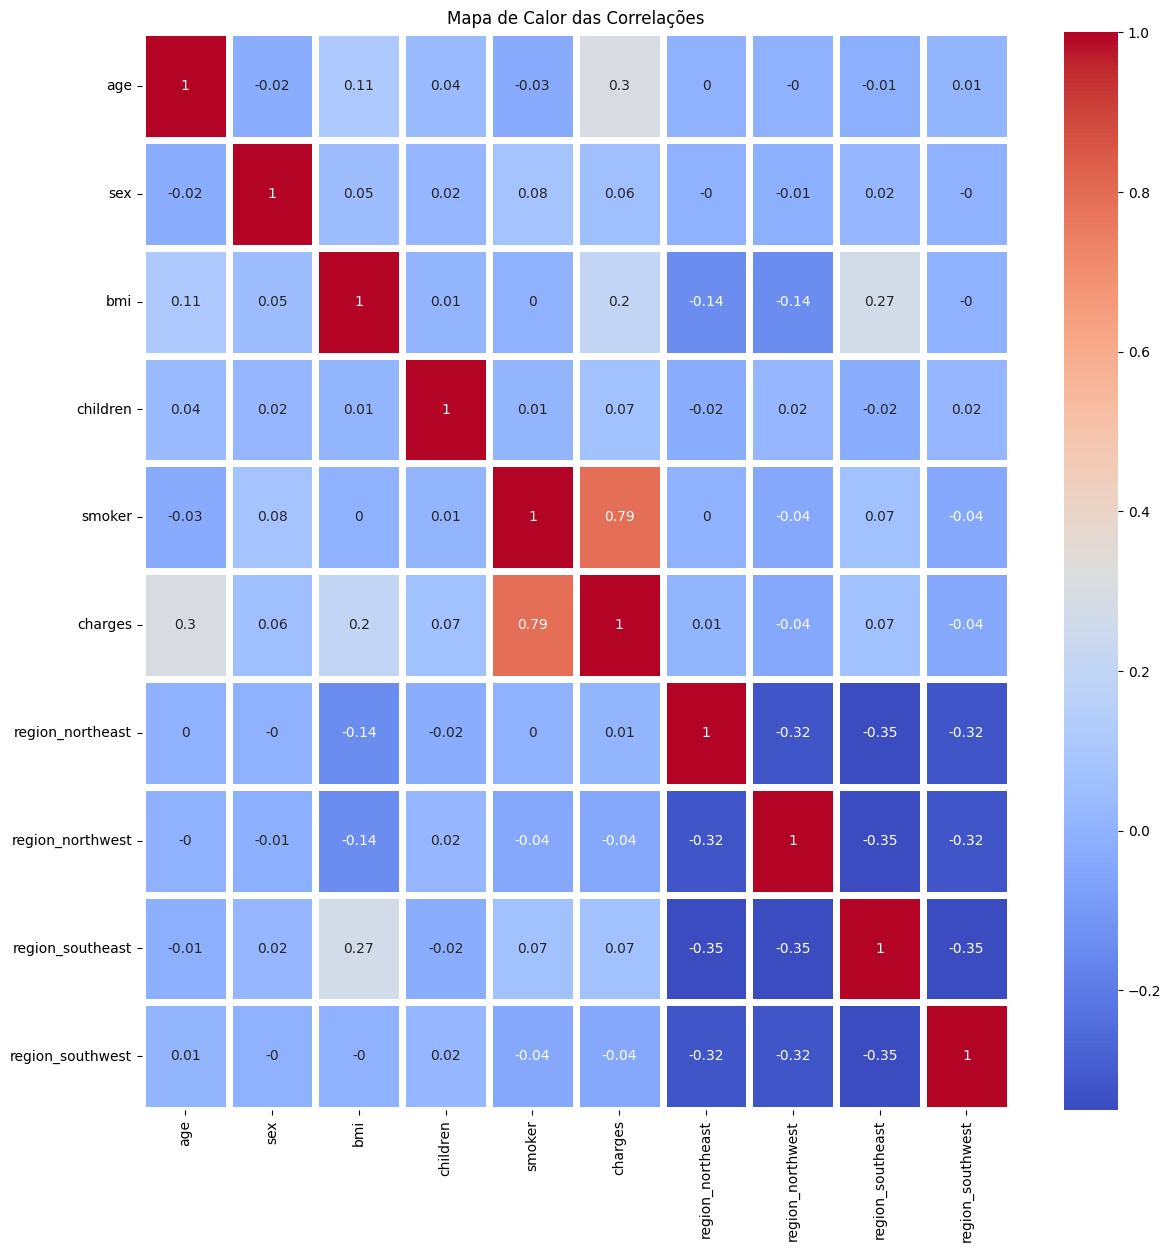

In [251]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, cmap='coolwarm', ax=ax)
plt.title('Mapa de Calor das Correlações')
plt.show()

# Divisão dos dados

Selecionando as features relevantes para o modelo, com base na análise da matriz de correlação.

Aqui selecionamos as colunas que têm boa correlação com a variável alvo 'encargos'

Selecionar apenas as colunas com boa correlação com a variável target (neste caso, encargos) pode ser uma estratégia eficaz para simplificar o modelo e melhorar seu desempenho.
  
No entanto, a abordagem depende do tipo de modelo e do problema específico que você está resolvendo.

Considerações para Modelos de Regressão:

Regressão Linear e Seleção de Features:

Correlação Linear: Em modelos de regressão linear, a correlação entre as variáveis independentes (X) e a variável dependente (y) é particularmente importante, pois a regressão linear assume uma relação linear entre as variáveis. Colunas com correlação fraca podem adicionar ruído e afetar negativamente o desempenho do modelo.

Overfitting: Incluir muitas variáveis com baixa ou nenhuma correlação pode levar ao overfitting, onde o modelo se ajusta demais aos dados de treinamento, mas não generaliza bem para novos dados.

Relevância das Features:

Remover Features Irrelevantes: Se uma feature (como filhos) mostra uma correlação muito baixa com a variável alvo (encargos), ela pode ser removida para simplificar o modelo, a menos que haja uma razão contextual para mantê-la.
Mantendo Features Relevantes: Features com correlação moderada a alta devem ser mantidas, pois são mais prováveis de contribuir para a capacidade preditiva do modelo.

Conclusão:

Para o seu modelo de regressão linear, é uma boa prática selecionar apenas as colunas com uma correlação significativa com a variável alvo.
Isso não só simplifica o modelo, mas também pode melhorar seu desempenho.

In [252]:
X = dados[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = dados['charges']

 Separando os dados em conjuntos de treino e teste para avaliar o desempenho do modelo

 80% dos dados são usados para treinar o modelo e 20% são reservados para teste

 Separar de base de treino da base de teste.

 Um base de treino é usada para treinar o modelo para que ele aprenda com as caracteristicas que temos na base de dados e a base de teste servirá para entregar ao modelo já treinado e verificar se ele acerta de acordo com o treinamento para separar os dados, coletamos os dados historicos já coletados
 de acordo com as boas praticas, para segregacao de bases, separamos de 70% a 80% para treinamento do algoritmo e 30% a 20% para teste na base de treino precisamos de mais dados para ensinar como sao os comportamentos destes dados para que o algoritimo possa aprender.

 Quanto mais dados disponibilizamos para o modelo, melhor será a resposta do nosso modelo As vezes a base de dados nao é representativa por causa do volume de dados baixo, mas nem só volume é necessário. Precisamos de dados que representativos que nos traga uma resposta

Após separar o treino, escolhemos o algoritmo classificador de forma
 automatizada.
 Criamos um modelo preditivo que será colocado em producao.
 Com nossa base de teste podemos detectar a acuracia do nosso modelo
 separar um percentual para treinar e testar. Test_size 0.2 é o tamanho
 da minha base de teste. O resto é dedicado para a base de treinamento
 Como a nossa variável y ("encargos") é numérica contínua,
 então o parâmetro stratify não deve ser usado, pois ele é aplicável
 apenas para dados categóricos.
 random_state é a semente aleatoria que pega uma certa visao dos dados.

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 7) (268, 7) (1070,) (268,)


# Padronizando os Dados

Isso é importante para modelos como regressão linear, que são sensíveis às escalas das variáveis.

## Regressão Linear

A padronização pode ser útil, especialmente se as features têm escalas muito diferentes. Por exemplo, idade pode variar de 0 a 100, enquanto as variáveis categóricas binárias (fumante, região_nordeste, etc.) variam apenas entre 0 e 1. Isso pode causar coeficientes de diferentes magnitudes e afetar a interpretação do modelo.

Para um modelo de regressão linear, é recomendável padronizar os dados, especialmente porque há variáveis com escalas diferentes (idade, IMC vs. variáveis binárias). Isso pode ajudar a melhorar a performance do modelo e garantir que todas as features sejam tratadas de maneira equitativa pelo algoritmo.

## Padronização com StandardScaler

Na regressão linear, a padronização com StandardScaler é útil para tratar as diferentes magnitudes das features, garantindo que o modelo interprete corretamente os coeficientes e as contribuições das features.

In [254]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo

Treinando o modelo de regressão linear com os dados padronizados.

A regressão linear ajusta um modelo linear simples para prever os encargos com base nas features selecionadas

In [255]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Avaliação do modelo

Fazendo previsões no conjunto de teste para avaliar o desempenho do modelo

In [256]:
y_pred = model.predict(X_test_scaled)


O Mean Squared Error (MSE) é uma métrica que mede a média dos quadrados dos
erros ou desvios, ou seja, a diferença entre os valores previstos e os valores reais.
Quanto menor o MSE, melhor o modelo está ajustando os dados. No entanto,
o MSE por si só não fornece um valor intuitivo, pois está em termos quadráticos
das unidades da variável alvo (neste caso, encargos).

O R² Score, por outro lado, é uma métrica que indica a proporção da
variabilidade dos dados que é explicada pelo modelo. O R² varia de 0 a 1,
onde 1 indica que o modelo explica perfeitamente toda a variabilidade dos dados,
 e 0 indica que o modelo não explica nada da variabilidade. Um valor negativo pode
 ocorrer se o modelo estiver ajustando pior do que uma linha horizontal na média dos dados.

 Os valores de MSE e R² obtidos nesta avaliação indicam o quão bem o modelo de
 regressão linear está se ajustando aos dados de teste.
Se o MSE for relativamente baixo e o R² for próximo de 1,
isso sugere que o modelo tem um bom desempenho. Caso contrário,
 ajustes ou melhorias no modelo podem ser necessários.

 Avaliando o modelo usando Mean Squared Error (MSE) e R² Score
 O MSE mede a média dos quadrados dos erros de previsão (quanto menor, melhor)
 O R² Score indica a proporção da variabilidade dos dados que é explicada pelo
 modelo (quanto mais próximo de 1, melhor)

In [257]:
erro_medio_quadratico = mean_squared_error(y_test, y_pred)
erro_absoluto_medio = mean_absolute_error(y_test, y_pred)
r_quadrado = r2_score(y_test, y_pred)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

Erro Médio Quadrático: 34153962.81690321
Erro Absoluto Médio: 4226.181315877729
R² (coeficiente de determinação): 0.7800044386357761


# Visualizando resultados

Plotar Previsões vs Valores Reais:
Usamos matplotlib para criar um gráfico de dispersão onde o eixo x representa os valores reais e o eixo y representa as previsões do modelo.

A linha vermelha tracejada representa a linha de identidade onde as previsões seriam perfeitas (real=y pred).


Notas:Gráfico de Dispersão: Pontos próximos à linha de identidade indicam boas previsões, enquanto pontos distantes indicam erros maiores.

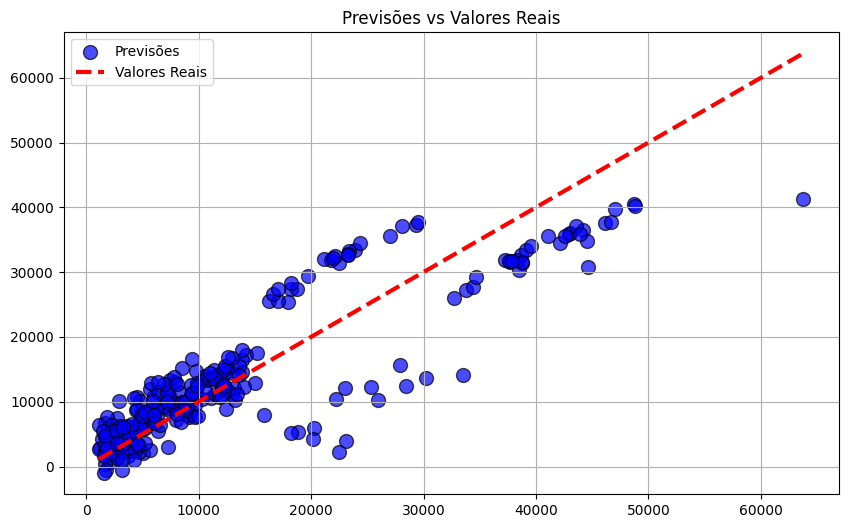

In [258]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)  # Linha de identidade
plt.legend(['Previsões', 'Valores Reais'])
plt.title('Previsões vs Valores Reais')
plt.grid(True)
plt.show()